In [23]:
!pip install nltk
!pip install wordcloud
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
#Libraries for visualisation
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Libraries for formattting and handling text 
import string 
import re
#Library for nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
#Library for Splitting Dataset
from sklearn.model_selection import train_test_split
#Libraries for NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import BatchNormalization, Bidirectional, Dense, Dropout, Embedding, LSTM, GRU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#Library for evaluation
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

2025-04-13 02:24:00.122323: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 02:24:00.132553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744482240.143703 2768426 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744482240.147039 2768426 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744482240.156061 2768426 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
train_data = pd.read_csv('/home/aicv/work/datasets/train.csv')

In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def toclean_text(text):

    
    clean_text = [char for char in text if char not in string.punctuation]
   
    clean_text = ''.join(clean_text)
    
        
    return clean_text

In [5]:
train_data['clean_text'] = train_data['text'].apply(toclean_text)

In [6]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [7]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)

# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

In [8]:
def clean_tweet(text):
    
    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)
    
    # replace abbreviations, @ and number
    text = replace_abbrev(text)  
    text = remove_mention(text)
    text = remove_number(text)
    
    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)
  
    return text

train_data["clean_text"] = train_data["clean_text"].apply(clean_tweet)

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/aicv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def toremove_stopword(text):
    remove_stopword = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return remove_stopword

train_data['clean_text'] = train_data['clean_text'].apply(toremove_stopword)

In [11]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(train_data['clean_text'].values)
X = tokenizer.texts_to_sequences(train_data['clean_text'].values)
X = pad_sequences(X)

print(X.shape)

(7613, 20)


In [12]:
tokenizer.sequences_to_texts([[ 713,  154,   56, 1434,   14]])

['reason earthquake may allah us']

In [13]:
y = train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =41)
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [14]:
# Hyperparameters
embed_dim = 1024
lstm_out = 512

# Improved model architecture
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1))

adam = optimizers.Adam(learning_rate=1e-4)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=adam, metrics=['accuracy'])
# Print the model summary with output shapes
batch_size = 512
block_size = X.shape[1]
model.build(input_shape=(batch_size, block_size))
model.summary(expand_nested=True, show_trainable=True)

I0000 00:00:1744482245.271098 2768426 service.cc:152] XLA service 0x6461a69c5790 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744482245.271126 2768426 service.cc:160]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1744482245.330629 2768426 service.cc:152] XLA service 0x6461a69e15b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744482245.330644 2768426 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
I0000 00:00:1744482245.335184 2768426 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7675 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ embedding (Embedding)       │ (512, 20, 1024)       │  3,072,000 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ lstm (LSTM)                 │ (512, 512)            │  3,147,776 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (512, 1)              │        513 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 6,220,289 (23.73 MB)

 Trainable params: 6,220,289 (23.73 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
class CustomEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, threshold, patience=2):
        super(CustomEarlyStopping, self).__init__()
        self.threshold = threshold
        self.patience = patience
        self.best_val_accuracy = 0.0
        self.wait_count = 0

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        current_val_acc = logs.get("val_accuracy")
        if current_val_acc is None:
            return

        # Check if we've reached the threshold
        if current_val_acc >= self.threshold:
            print(f"\nValidation accuracy reached the threshold {self.threshold:.2f}, stopping training!")
            self.model.stop_training = True
            return

        # If current accuracy is lower than the best, increase wait count
        if current_val_acc < self.best_val_accuracy:
            self.wait_count += 1
            print(f"\nValidation accuracy decreased for {self.wait_count} epoch(s)")
            if self.wait_count >= self.patience:
                print(f"\nValidation accuracy decreased for {self.patience} consecutive epochs, stopping training!")
                self.model.stop_training = True
        else:
            # Reset wait count if improvement is observed
            self.wait_count = 0

        # Update best validation accuracy if current is better
        if current_val_acc > self.best_val_accuracy:
            self.best_val_accuracy = current_val_acc

In [16]:
checkpoint = ModelCheckpoint('LSTM_Models/LSTM_best_model.h5',   # Save path and filename
                             monitor='val_accuracy',  # Monitor validation accuracy
                             mode='max',              # Higher is better
                             save_best_only=True,     # Save only the best model
                             verbose=1)            

# Set target accuracy to 0.90
custom_early_stop = CustomEarlyStopping(threshold=0.90, patience=3)

history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[custom_early_stop, checkpoint])
model.save('LSTM_Models/LSTM_final_model.h5')

Epoch 1/50


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5760 - loss: 0.6813
Epoch 1: val_accuracy improved from -inf to 0.56927, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.5756 - loss: 0.6809 - val_accuracy: 0.5693 - val_loss: 0.6643
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5675 - loss: 0.6627
Epoch 2: val_accuracy did not improve from 0.56927
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5677 - loss: 0.6626 - val_accuracy: 0.5693 - val_loss: 0.6547
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5760 - loss: 0.6512
Epoch 3: val_accuracy did not improve from 0.56927
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5755 - loss: 0.6511 - val_accuracy: 0.5693 - val_loss: 0.6427
Epoch 4/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5702 - loss: 0.6379
Epoch 4: val_accuracy did not improve from 0.56927
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5703 - loss: 0.6374 - val_accuracy: 0.5693 - val_loss: 0.6264
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5795 - loss: 0.6231
Epoch 5: val_accuracy improved from 0.56927

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5804 - loss: 0.6225 - val_accuracy: 0.6225 - val_loss: 0.6043
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6343 - loss: 0.5905
Epoch 6: val_accuracy improved from 0.62246 to 0.69665, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6353 - loss: 0.5902 - val_accuracy: 0.6967 - val_loss: 0.5750
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7110 - loss: 0.5549
Epoch 7: val_accuracy improved from 0.69665 to 0.72948, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7107 - loss: 0.5543 - val_accuracy: 0.7295 - val_loss: 0.5326
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7428 - loss: 0.5004
Epoch 8: val_accuracy improved from 0.72948 to 0.77413, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7435 - loss: 0.4999 - val_accuracy: 0.7741 - val_loss: 0.4866
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7902 - loss: 0.4468
Epoch 9: val_accuracy improved from 0.77413 to 0.77676, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7901 - loss: 0.4465 - val_accuracy: 0.7768 - val_loss: 0.4547
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7903 - loss: 0.4252
Epoch 10: val_accuracy improved from 0.77676 to 0.79842, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7913 - loss: 0.4241 - val_accuracy: 0.7984 - val_loss: 0.4397
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8267 - loss: 0.3821
Epoch 11: val_accuracy improved from 0.79842 to 0.80499, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8264 - loss: 0.3823 - val_accuracy: 0.8050 - val_loss: 0.4396
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8307 - loss: 0.3735
Epoch 12: val_accuracy improved from 0.80499 to 0.80827, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8310 - loss: 0.3729 - val_accuracy: 0.8083 - val_loss: 0.4317
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8335 - loss: 0.3529
Validation accuracy decreased for 1 epoch(s)

Epoch 13: val_accuracy did not improve from 0.80827
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8341 - loss: 0.3526 - val_accuracy: 0.8070 - val_loss: 0.4329
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8411 - loss: 0.3369
Epoch 14: val_accuracy improved from 0.80827 to 0.80959, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8414 - loss: 0.3368 - val_accuracy: 0.8096 - val_loss: 0.4360
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8455 - loss: 0.3373
Epoch 15: val_accuracy improved from 0.80959 to 0.81156, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8457 - loss: 0.3365 - val_accuracy: 0.8116 - val_loss: 0.4355
Epoch 16/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8598 - loss: 0.3227
Epoch 16: val_accuracy improved from 0.81156 to 0.81287, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8599 - loss: 0.3220 - val_accuracy: 0.8129 - val_loss: 0.4428
Epoch 17/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8562 - loss: 0.3145
Validation accuracy decreased for 1 epoch(s)

Epoch 17: val_accuracy did not improve from 0.81287
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8566 - loss: 0.3141 - val_accuracy: 0.8116 - val_loss: 0.4421
Epoch 18/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8636 - loss: 0.3059
Validation accuracy decreased for 2 epoch(s)

Epoch 18: val_accuracy did not improve from 0.81287
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8639 - loss: 0.3054 - val_accuracy: 0.8116 - val_loss: 0.4509
Epoch 19/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8760 - loss: 0.2844
Epoch 19: val_accuracy improved from 0.81287 to 0.81484, saving model to LSTM_Models/LSTM_best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8756 - loss: 0.2848 - val_accuracy: 0.8148 - val_loss: 0.4507
Epoch 20/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8738 - loss: 0.2769
Validation accuracy decreased for 1 epoch(s)

Epoch 20: val_accuracy did not improve from 0.81484
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8737 - loss: 0.2779 - val_accuracy: 0.8102 - val_loss: 0.4676
Epoch 21/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8725 - loss: 0.2830
Validation accuracy decreased for 2 epoch(s)

Epoch 21: val_accuracy did not improve from 0.81484
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8727 - loss: 0.2826 - val_accuracy: 0.8122 - val_loss: 0.4634
Epoch 22/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8747 - loss: 0.2754
Validation accuracy decreased for 3 epoch(s)

Validation accuracy decreased for 3 consecutive epochs, stopping training!

Epoch 22: val_accuracy did not improve from 0.81484
12/12 ━━━━━━━━━━━━━━━━━━

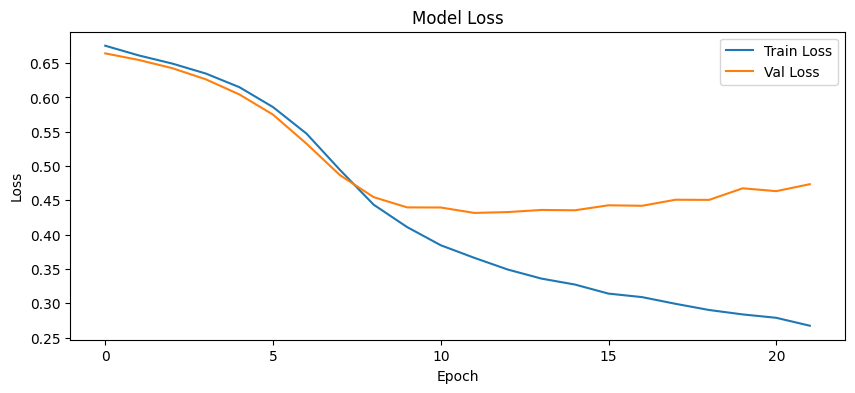

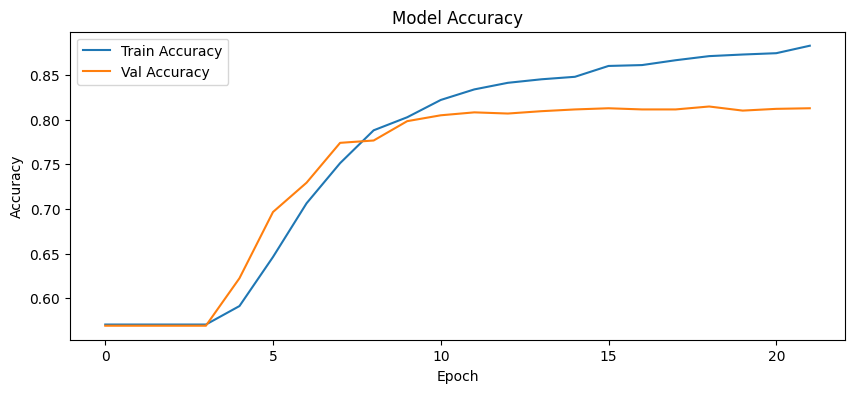

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [18]:
model = tf.keras.models.load_model('/home/aicv/work/LSTM_Models/LSTM_best_model.h5')

In [19]:
y_pred = model.predict(X_test).round()
y_pred

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


array([[-3.],
       [ 3.],
       [ 1.],
       ...,
       [-2.],
       [-1.],
       [-2.]], dtype=float32)

In [20]:
logits = model.predict(X_train)
probabilities = 1 / (1 + np.exp(-logits))
y_train_pred = np.round(probabilities).astype(int)

train_accuracy_manual = metrics.accuracy_score(y_train, y_train_pred)
train_precision_manual = metrics.precision_score(y_train, y_train_pred)
train_recall_manual = metrics.recall_score(y_train, y_train_pred)

print("Train Accuracy:", train_accuracy_manual)
print("Train Precision:", train_precision_manual)
print("Train Recall:", train_recall_manual)

191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Train Accuracy: 0.8866995073891626
Train Precision: 0.9208570179274158
Train Recall: 0.8053537284894837


In [21]:
y_pred_proba = 1/(1 + np.exp(-y_pred))  # Convert logits to probabilities
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Or if your predictions are already probabilities
# y_pred_binary = (y_pred > 0.5).astype(int)

print('Accuracy is: ', metrics.accuracy_score(y_test, y_pred_binary))
print('Recall is: ', metrics.recall_score(y_test, y_pred_binary))
print('Precision is: ', metrics.precision_score(y_test, y_pred_binary))

Accuracy is:  0.81483913328956
Recall is:  0.6814024390243902
Precision is:  0.8596153846153847


In [22]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the test data
test_data = pd.read_csv('/home/aicv/work/datasets/test.csv')

# Preprocess the text column using the same functions as in training
test_data['clean_text'] = test_data['text'].apply(toclean_text)
test_data['clean_text'] = test_data['clean_text'].apply(clean_tweet)
test_data['clean_text'] = test_data['clean_text'].apply(toremove_stopword)

# Convert text to sequences using the same tokenizer as during training
X_test = tokenizer.texts_to_sequences(test_data['clean_text'].values)

# Pad the sequences to the same length as during training
X_test = pad_sequences(X_test, maxlen=X.shape[1])

# Predict logits
logits = model.predict(X_test)

# Convert logits to probabilities
probabilities = 1 / (1 + np.exp(-logits))

# Round to get binary predictions
y_pred = np.round(probabilities).astype(int)
# Create the output in the required format (id and target)
submission = pd.DataFrame({
    'id': test_data['id'],  # Use the 'id' column from the test data
    'target': y_pred.flatten()  # Flatten predictions to match the format
})

# Save the predictions to a CSV file
submission.to_csv('/home/aicv/work/LSTM_Result/LSTM_result.csv', index=False)

print("Predictions saved to 'LSTM_Result/LSTM_result.csv'")

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Predictions saved to 'LSTM_Result/LSTM_result.csv'
